In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
#import tensorflow as tf
#from tensorflow.contrib import skflow

In [54]:
loc_train="/home/siddharth/Documents/Titanic/train.csv"
loc_test="/home/siddharth/Documents/Titanic/test.csv"
train=pd.read_csv(loc_train)
test=pd.read_csv(loc_test)
#print (train.info())
#print (train.describe())


target=train.Survived
train.drop('Survived',axis=1,inplace=True)

#missing values only in age
combined=train.append(test)
combined.reset_index(inplace=True)
combined.drop('index',axis=1,inplace=True)
#print (combined.head())
#print (combined.describe())

In [55]:
#def get_title():
#    combined['Title']=combined['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
#    combined.drop('Name',axis=1,inplace=True)
#    return combined
def get_titles():


    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    combined.drop('Name',axis=1,inplace=True)
get_titles()

print (combined.describe())


       PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    14.413493     1.041658     0.865560   
min       1.000000     1.000000     0.170000     0.000000     0.000000   
25%     328.000000     2.000000    21.000000     0.000000     0.000000   
50%     655.000000     3.000000    28.000000     0.000000     0.000000   
75%     982.000000     3.000000    39.000000     1.000000     0.000000   
max    1309.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  


In [56]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [57]:


def process_age():
    
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    
process_age()

def get_sex():
    combined['Sex']=combined['Sex'].map({'male':0,'female':1})
    return combined
get_sex()
combined.head()

/home/siddharth/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [58]:
#combined["Age"] = combined.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [59]:


combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [60]:

combined.drop('Cabin',axis=1,inplace=True)
combined['Embarked'].fillna('S',inplace=True)
combined['Fare'].fillna(combined['Fare'].median(),inplace=True)

#combined=combined.dropna()
print (combined.describe())


       PassengerId       Pclass          Sex          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000     2.294882     0.355997    29.223583     0.498854   
std     378.020061     0.837836     0.478997    13.387233     1.041658   
min       1.000000     1.000000     0.000000     0.170000     0.000000   
25%     328.000000     2.000000     0.000000    21.000000     0.000000   
50%     655.000000     3.000000     0.000000    26.000000     0.000000   
75%     982.000000     3.000000     1.000000    36.500000     1.000000   
max    1309.000000     3.000000     1.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1309.000000  
mean      0.385027    33.281086  
std       0.865560    51.741500  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


In [61]:
#combined['Age'].fillna(combined['Age'].median(),inplace=True)
#combined.drop('Title',axis=1,inplace=True)
#combined.drop('PassengerId',axis=1,inplace=True)
combined.drop('Ticket',axis=1,inplace=True)

titles_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
combined = pd.concat([combined,titles_dummies],axis=1)
combined.drop('Embarked',axis=1,inplace=True)

titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
combined = pd.concat([combined,titles_dummies],axis=1)
combined.drop('Title',axis=1,inplace=True)
print (combined.describe())






       PassengerId       Pclass          Sex          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000     2.294882     0.355997    29.223583     0.498854   
std     378.020061     0.837836     0.478997    13.387233     1.041658   
min       1.000000     1.000000     0.000000     0.170000     0.000000   
25%     328.000000     2.000000     0.000000    21.000000     0.000000   
50%     655.000000     3.000000     0.000000    26.000000     0.000000   
75%     982.000000     3.000000     1.000000    36.500000     1.000000   
max    1309.000000     3.000000     1.000000    80.000000     8.000000   

             Parch         Fare   Embarked_C   Embarked_Q   Embarked_S  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      0.385027    33.281086     0.206264     0.093965     0.699771   
std       0.865560    51.741500     0.404777     0.291891     0.458533   
min       0.000000     0.000000     0

In [62]:
train_new=combined[:891]
test_new=combined[891:]

X,x,Y,y=train_test_split(train_new,target,train_size=0.8)
train_new.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId      891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
Title_Master     891 non-null uint8
Title_Miss       891 non-null uint8
Title_Mr         891 non-null uint8
Title_Mrs        891 non-null uint8
Title_Officer    891 non-null uint8
Title_Royalty    891 non-null uint8
dtypes: float64(2), int64(5), uint8(9)
memory usage: 56.6 KB


In [69]:
clf=RandomForestClassifier(n_estimators=100)
#clf=svm.SVC(C=10000.0,kernel='rbf')
#clf = MLPClassifier()
clf.fit(X,Y)
clf.score(x,y)


0.83798882681564246

In [70]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit (train_new,target)
clf_dt.score (train_new,target)

0.95173961840628507

In [73]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
#test_classifier(clf_rf)

clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
#test_classifier(clf_gb)

eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
#test_classifier(eclf)

eclf.fit(train_new,target)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_...s=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))],
         n_jobs=1, voting='hard', weights=None)

In [74]:
pred=eclf.predict(test_new)

In [718]:
#clf=RandomForestClassifier(n_estimators=50)
#clf.fit(train_new,target)

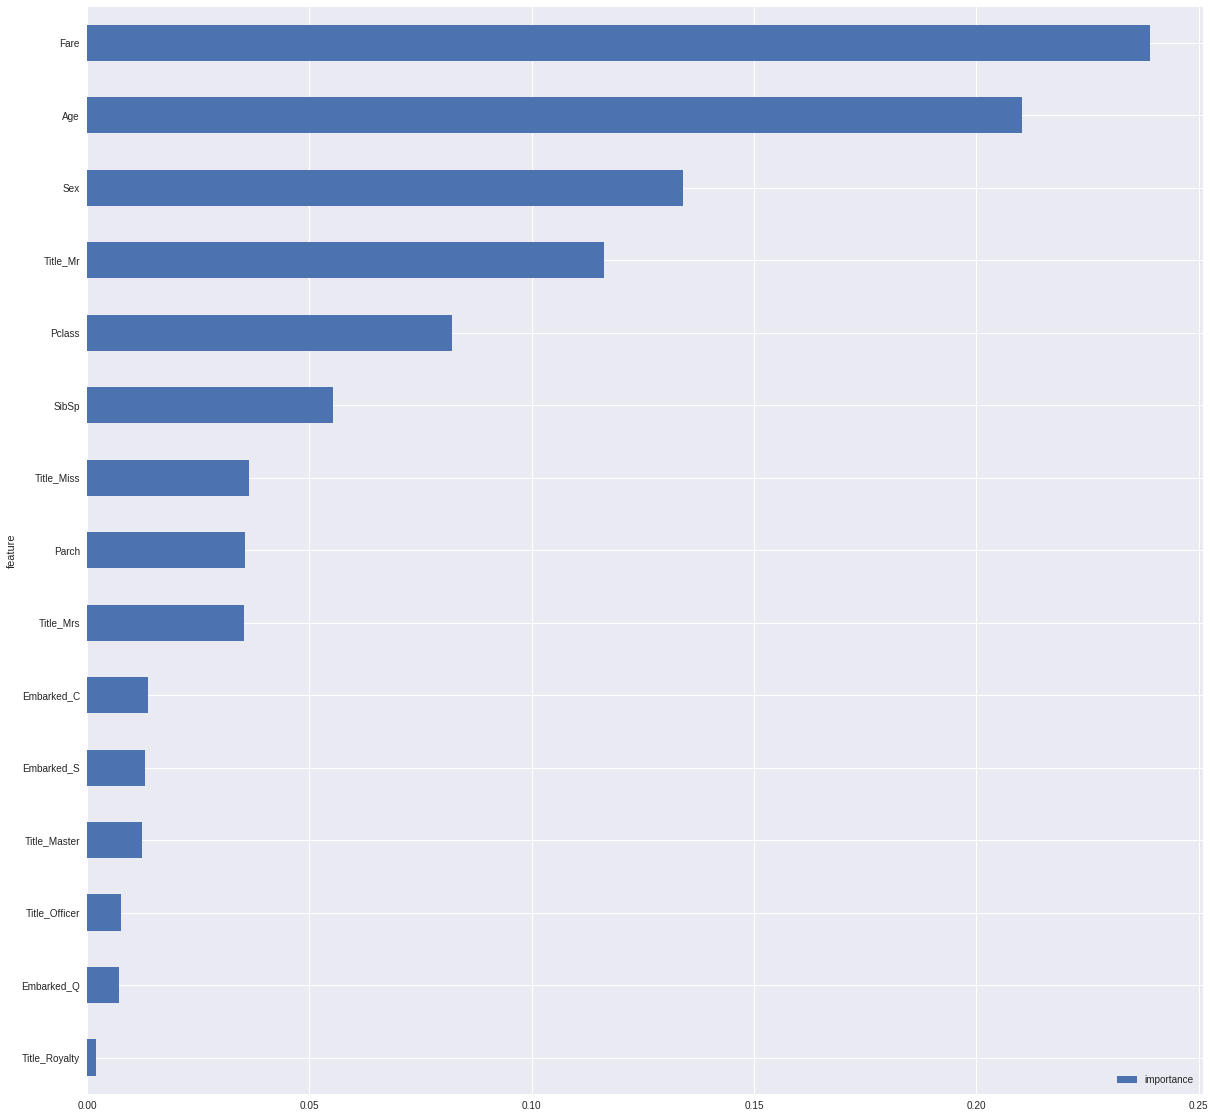

In [719]:

features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(20, 20))

In [720]:
#pred=clf.predict(test_new)

In [75]:
output=pd.DataFrame()
output['PassengerId']=test['PassengerId']
output['Survived']=pred

output[['PassengerId','Survived']].to_csv("/home/siddharth/Documents/Titanic/output_new.csv",index=False)